In [52]:
import os
import math
from PIL import Image
import io

import pystan
import numpy as np
from scipy import sparse
from scipy import stats as sts

import h5py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

from chembl_webresource_client.new_client import new_client


root = './dataset'
hf = h5py.File(os.path.join(root, "cdk2.h5"), "r")
ids = hf["chembl_id"][()] # the name of each molecules
ap = sparse.csr_matrix((hf["ap"]["data"], hf["ap"]["indices"], hf["ap"]["indptr"]), shape=[len(hf["ap"]["indptr"]) - 1, 2039])
mg = sparse.csr_matrix((hf["mg"]["data"], hf["mg"]["indices"], hf["mg"]["indptr"]), shape=[len(hf["mg"]["indptr"]) - 1, 2039])
tt = sparse.csr_matrix((hf["tt"]["data"], hf["tt"]["indices"], hf["tt"]["indptr"]), shape=[len(hf["tt"]["indptr"]) - 1, 2039])

features = sparse.hstack([ap, mg, tt]).toarray() # the samples' features, each row is a sample, and each sample has 3*2039 features
labels = hf["label"][()] # the label of each molecule

In [4]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import os

root = './dataset'

molecule = new_client.molecule
res = molecule.search('CHEMBL28')

INFO:chembl_webresource_client.url_query:headers:
INFO:chembl_webresource_client.url_query:{'Accept': 'image/png'}
INFO:chembl_webresource_client.url_query:https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL28
INFO:chembl_webresource_client.url_query:From cache: True
INFO:chembl_webresource_client.url_query:headers:
INFO:chembl_webresource_client.url_query:{'Accept': 'image/png'}
INFO:chembl_webresource_client.url_query:https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL29
INFO:chembl_webresource_client.url_query:From cache: False


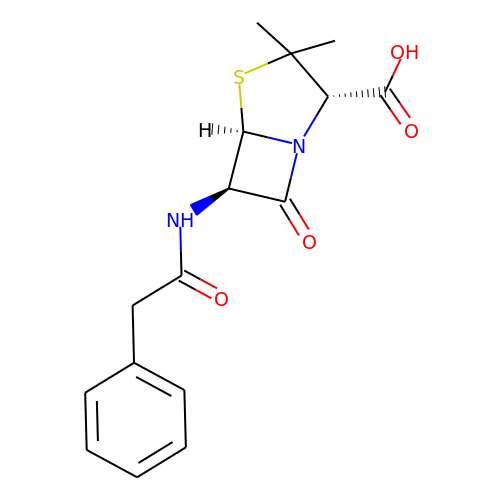

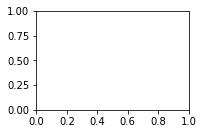

In [43]:
from chembl_webresource_client.new_client import new_client
from IPython.display import Image

plt.subplot(2, 2, 1)
Image(new_client.image.get('CHEMBL28'))
Image(new_client.image.get('CHEMBL29'))

INFO:chembl_webresource_client.url_query:headers:
INFO:chembl_webresource_client.url_query:{'Accept': 'image/png'}
INFO:chembl_webresource_client.url_query:https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL28
INFO:chembl_webresource_client.url_query:From cache: True


(-0.5, 499.5, 499.5, -0.5)

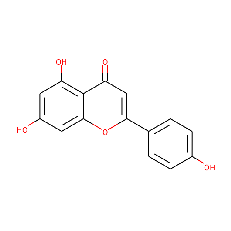

In [56]:
image_bytes = new_client.image.get('CHEMBL28')
image = np.array(Image.open(io.BytesIO(image_bytes)))

plt.imshow(image)
plt.axis('off')

In [57]:
features[:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [7]:
a = pd.read_csv(os.path.join(root, "cdk2_train.csv"))
a.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.8096,0.8097,0.8098,0.8099,0.8100,0.8101,0.8102,0.8103,0.8104,0.8105
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
len(a)

1557

In [8]:
import numpy as np
import corex as ce

In [13]:
X = np.array([[0,0,0,1,0], # A matrix with rows as samples and columns as variables.
              [0,0,1,1,23],
              [1,1,1,0,0],
              [1,1,1,1,1]], dtype=int)

layer1 = ce.Corex(n_hidden=3)  # Define the number of hidden factors to use.
layer1.fit(X)

print(layer1.labels[0])  # Labels for each sample for Y_0

print(layer1.labels[1])  # Labels for each sample for Y_1

[0 0 1]
[0 0 1]
